# Modeling

In [102]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [103]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [104]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post ...,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just...,no_text,593,39723,0.98,1


In [105]:
plants.shape

(9271, 8)

In [106]:
X = plants['title']
y = plants['subreddit']

In [107]:
X.shape

(9271,)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [109]:
X_train.shape

(6953,)

In [110]:
cvec = CountVectorizer(
    max_features=5_000,
    min_df=2,
    max_df=.9,
    ngram_range=(1, 2),
    stop_words='english'
)

In [111]:
cvec.fit(X_train)

CountVectorizer(max_df=0.9, max_features=5000, min_df=2, ngram_range=(1, 2),
                stop_words='english')

In [112]:
X_train_cvec = cvec.transform(X_train)

In [113]:
cvec.get_feature_names_out()

array(['00 did', '000', '10', ..., 'zz plant', 'zz plants', 'zz raven'],
      dtype=object)

In [114]:
X_train_cvec

<6953x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 38257 stored elements in Compressed Sparse Row format>

In [115]:
X_train_df = pd.DataFrame(X_train_cvec.todense(), columns=cvec.get_feature_names_out())

In [116]:
X_train_df.head()

,00 did,000,10,10 bucks,10 croc,10 facebook,10 feet,10 months,10 year,10 years,...,zone 8b,zone 9b,zoom,zucchini,zucchini huge,zz,zz growth,zz plant,zz plants,zz raven
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

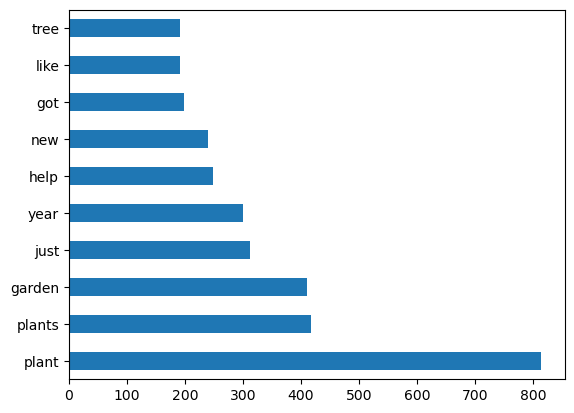

In [117]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [118]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier())
])

In [119]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('et', ExtraTreesClassifier())])

In [120]:
pipe.score(X_train, y_train)

0.9953976700704732

In [121]:
pipe.score(X_test, y_test)

0.8429680759275238

In [122]:
1 - y.mean()

0.4891597454427785

In [123]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('et', ExtraTreesClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'et': ExtraTreesClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'et__bootstrap': False,
 'et__ccp_alpha': 0.0,
 'et__class_weight': None,
 'et__criterion': 'gini',
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__max_leaf_nodes': None,
 'et__max_samples': None,
 'et__min_impurity_decrease': 0.0,
 'et__min_samples_leaf': 1,
 'et__min_samples_split': 2,
 'et__min_weight_fraction_leaf': 0.0,
 'et__n_estima

In [124]:
pipe_params = {
    'et__n_estimators': [500],
    'et__max_features': ['sqrt'],
    'et__max_depth': [None],
    'et__min_samples_leaf': [1],
    'et__oob_score': [True],
    'cvec__max_features': [5_000],
    'cvec__min_df': [2],
    'cvec__max_df': [.9],
    'cvec__ngram_range': [(1, 2)],
    'cvec__stop_words': ['english'],
    'et__bootstrap': [True]
}

In [125]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5,
                  n_jobs=8
)

In [126]:
%%time
gs.fit(X_train, y_train)

CPU times: user 23 s, sys: 1.92 s, total: 24.9 s
Wall time: 47.5 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('et', ExtraTreesClassifier())]),
             n_jobs=8,
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [5000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': ['english'],
                         'et__bootstrap': [True], 'et__max_depth': [None],
                         'et__max_features': ['sqrt'],
                         'et__min_samples_leaf': [1], 'et__n_estimators': [500],
                         'et__oob_score': [True]})

In [127]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'et__bootstrap': True,
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__min_samples_leaf': 1,
 'et__n_estimators': 500,
 'et__oob_score': True}

In [128]:
gs.score(X_train, y_train)

0.9792895153171293

In [129]:
gs.score(X_test, y_test)

0.8347713546160483

In [130]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

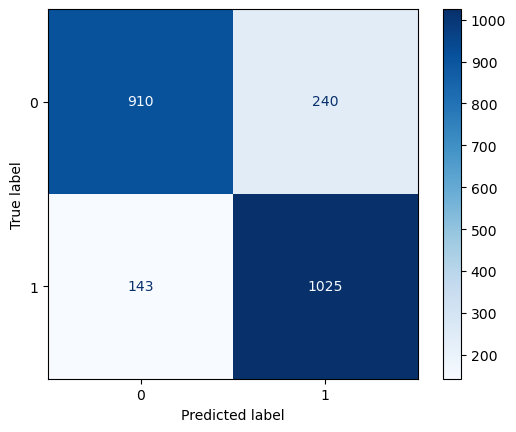

In [131]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Blues');

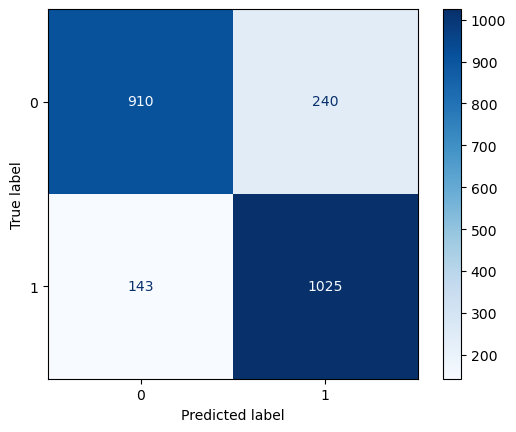

In [132]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues');

In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.86420   0.79130   0.82615      1150
           1    0.81028   0.87757   0.84258      1168

    accuracy                        0.83477      2318
   macro avg    0.83724   0.83444   0.83436      2318
weighted avg    0.83703   0.83477   0.83443      2318

